## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>

In [1]:
import pandas as pd

data_2017_1 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2017_1.csv', header = 0)
data_2017_2 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2017_2.csv', header = 0)

data_2018_1 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2018_1.csv', header = 0)
data_2018_2 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2018_2.csv', header = 0)

data_2019_1 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2019_1.csv', header = 0)
data_2019_2 = pd.read_csv('/Users/sergiocuencanunez/TFG-BA/polusa_balanced/2019_2.csv', header = 0)

In [2]:
data = pd.concat([data_2017_1, data_2017_2, data_2018_1, data_2018_2, data_2018_1, data_2019_2], axis = 0)
data.head()

,id,date_publish,outlet,headline,lead,body,authors,domain,url,political_leaning
0,55171935,2017-01-01 00:00:00,Los Angeles Times,Afghan refugees coming to California struggle ...,NaN,California's capital has emerged as a leading ...,Associated Press,www.latimes.com,http://www.latimes.com/local/lanow/la-me-ln-af...,LEFT
1,55208434,2017-01-01 00:00:00,NBC News,Minimum Wages Will Rise in Nearly Two Dozen St...,"Twenty-two states, plus the District of Columb...",Play Facebook\nTwitter\nGoogle Plus\nEmbed Tru...,Emma Margolin,www.nbcnews.com,http://www.nbcnews.com/news/us-news/minimum-wa...,CENTER
2,55172357,2017-01-01 00:00:00,Los Angeles Times,Fire engulfs Long Beach apartment unit; man fo...,NaN,A man was found dead as a fire engulfed an apa...,Rong-Gong Lin Ii,www.latimes.com,http://www.latimes.com/local/lanow/la-me-ln-lo...,LEFT
3,115892789,2017-01-01 00:00:00,ABC News,Obama Boosted White House Technology; Trump Se...,Obama Boosted White House Technology; Trump Se...,As Barack Obama began preparing to leave offic...,Abc News,abcnews.go.com,http://abcnews.go.com/Technology/wireStory/oba...,CENTER
4,4375253,2017-01-01 00:00:00,Fox News,Most residents evacuated by sinkhole could ret...,The new public works commissioner in a suburba...,The new public works commissioner in a suburba...,NaN,www.foxnews.com,http://www.foxnews.com/us/2017/01/01/most-resi...,RIGHT


### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.1. Key Features to Use </span>

- Check for null values.

In [3]:
data.isna().sum()

id                        0
date_publish              0
outlet                    0
headline                 30
lead                  63871
body                      0
authors              182664
domain                    0
url                       0
political_leaning         0
dtype: int64

- Since 30 is a small fraction of 939,838 rows, we can safely drop these rows.
- Drop the lead column because summarizing the body captures essential information more effectively, making it redundant.
- Drop the authors column since it won’t be used in the recommendation pipeline.

In [4]:
data = data.dropna(subset = ['headline'])
data = data.drop(columns = ['lead'])
data = data.drop(columns = ['authors'])

- Remove rows with political_leaning as `UNDEFINED` to ensure clear ideological classification, critical for maintaining balanced political representation in recommendations

In [5]:
data = data[data['political_leaning'] != 'UNDEFINED'].reset_index(drop=True)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.2. Stratified Sampling for Political Balance </span>

In [ ]:
leaning_counts = data['political_leaning'].value_counts()
print("Articles per political leaning before sampling:\n", leaning_counts)

min_class_size = leaning_counts.min()
balanced_size = min_class_size * 3

data_balanced = pd.DataFrame()

for leaning in ["LEFT", "CENTER", "RIGHT"]:
    leaning_group = data[data["political_leaning"] == leaning]
    
    if len(leaning_group) > min_class_size:
        sampled = leaning_group.sample(n = min_class_size, random_state = 42)
    else:
        sampled = leaning_group
    
    data_balanced = pd.concat([data_balanced, sampled])

data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced dataset size:", len(data_balanced))
print("Articles per political leaning after sampling:\n", data_balanced['political_leaning'].value_counts())

Articles per political leaning before sampling:
 political_leaning
LEFT      277995
CENTER    257216
RIGHT     148037
Name: count, dtype: int64
Balanced dataset size: 444111
Articles per political leaning after sampling:
 political_leaning
RIGHT     148037
LEFT      148037
CENTER    148037
Name: count, dtype: int64


In [8]:
data_balanced.head()

,id,date_publish,outlet,headline,body,domain,url,political_leaning
0,4351519,2018-03-30 17:52:36,Breitbart,WATCH: Suspect Allegedly Points Gun at Texas O...,"On Thursday, an officer in Pasadena, Texas, sh...",www.breitbart.com,http://www.breitbart.com/big-government/2018/0...,RIGHT
1,52951109,2017-03-27 00:00:00,NPR,New Chief Minister For India's Largest State H...,New Chief Minister For India's Largest State H...,www.npr.org,http://www.npr.org/2017/03/27/521622800/new-ch...,LEFT
2,115984026,2018-08-11 04:46:44,ABC News,Japan checking report of Japanese man held in ...,Japan says it is looking into reports that a J...,abcnews.go.com,https://abcnews.go.com/International/wireStory...,CENTER
3,55352298,2018-10-18 00:00:00,NBC News,Remains in Kansas identified as missing Army v...,Remains found in a Kansas neighborhood have be...,www.nbcnews.com,https://www.nbcnews.com/feature/missing-in-ame...,CENTER
4,4509329,2018-04-17 03:24:00,Fox News,Orange County city votes again to opt out of C...,A Southern California city council voted Monda...,www.foxnews.com,http://www.foxnews.com/politics/2018/04/17/ora...,RIGHT


In [9]:
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444111 entries, 0 to 444110
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 444111 non-null  int64 
 1   date_publish       444111 non-null  object
 2   outlet             444111 non-null  object
 3   headline           444111 non-null  object
 4   body               444111 non-null  object
 5   domain             444111 non-null  object
 6   url                444111 non-null  object
 7   political_leaning  444111 non-null  object
dtypes: int64(1), object(7)
memory usage: 27.1+ MB


### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.2. Body Summarizing </span>

Need to summarize the body or the articles as it is very long:
- Reduce Noise: The original text often contains irrelevant or repetitive information. Summarization extracts key points, removing unnecessary content.
- Improve Efficiency: Shorter text makes the recommender system faster and more accurate.
- Better Similarity Calculation: Summaries help the model focus on core ideas, enhancing content-based recommendation quality.

In [10]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer

# Define sumy summarization function
def summarize_text(text, num_sentences = 3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return ' '.join([str(sentence) for sentence in summary])

In [11]:
data_balanced["body_summary"] = data_balanced["body"].apply(lambda x: summarize_text(x, num_sentences =   3))

In [13]:
data_balanced["text"] = data_balanced["headline"] + " " + data_balanced["body_summary"]

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.3. Text Cleaning </span>

- Remove extra whitespaces: Remove leading, trailing, and extra spaces.
- Remove Special Characters: Eliminate non-alphanumeric characters (e.g., !@#$%) as they add noise.
- Convert to Lowercase: Standardize text for better token matching.
- Remove Stopwords: Remove common words (e.g., "the", "is") that don’t add significant meaning.
- Lemmatization: Reduce words to their base form (e.g., "running" → "run").

In [15]:
import re
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Define the text cleaning function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove special characters
    text = re.sub(r'\W', ' ', str(text))  

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove not alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    # Lemmatization and stop words removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
data_balanced['tokens'] = data_balanced['text'].apply(clean_text)
data_balanced['text_cleaned'] = data_balanced['tokens'].apply(lambda x: ' '.join(x))

In [17]:
data_balanced.to_csv("../data/news_data.csv", index = False)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 1.3. Visualizations </span>

- Most Common Named Entities (NER) in headlines to find the most frequently mentioned people, organizations, or locations in headlines

In [26]:
import spacy
from collections import Counter

# Load SpaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Dictionary to merge common variations of names
name_mapping = {
    "trump": "Donald Trump",
    "donald trump": "Donald Trump",
    "donald trump's": "Donald Trump",
    "trump's": "Donald Trump",
    "clinton": "Hillary Clinton",
    "hillary clinton": "Hillary Clinton",
    "obama": "Barack Obama",
    "putin": "Vladimir Putin",
    "kim jong un": "Kim Jong-un",
    "michael cohen": "Michael Cohen",
    "mueller": "Robert Mueller",
    "comey": "James Comey",
    "macron": "Emmanuel Macron",
    "netanyahu": "Benjamin Netanyahu"
}

# Dictionary to normalize locations
location_mapping = {
    "us": "United States",
    "u.s.": "United States",
    "usa": "United States",
    "uk": "United Kingdom",
    "north korea": "North Korea",
    "iran": "Iran",
    "syria": "Syria",
    "california": "California",
    "texas": "Texas",
    "florida": "Florida",
    "china": "China",
    "russia": "Russia"
}

# Function to extract named entities with normalization
def extract_named_entities(text_series, entity_label, top_n = 10, filter_list = None, mapping_dict = None):
    entity_counter = Counter()
    filter_list = set(filter_list) if filter_list else set()
    
    for text in text_series:
        doc = nlp(text)
        for ent in doc.ents:
            entity_text = ent.text.lower()
            
            # Normalize entity name if it's in the mapping dictionary
            if mapping_dict and entity_text in mapping_dict:
                entity_text = mapping_dict[entity_text]
            
            # Add to counter if not in filter list
            if ent.label_ == entity_label and entity_text not in filter_list:
                entity_counter[entity_text] += 1
    
    return entity_counter.most_common(top_n)

# Exclude incorrect entities per category
excluded_people = ["brexit", "twitter"]

# Extract Named Entities with normalization applied
top_entities, top_entities_count = zip(*extract_named_entities(data_balanced["headline"], entity_label="PERSON", filter_list = excluded_people, mapping_dict = name_mapping))
top_locations, top_locations_count = zip(*extract_named_entities(data_balanced["headline"], entity_label="GPE", mapping_dict = location_mapping))

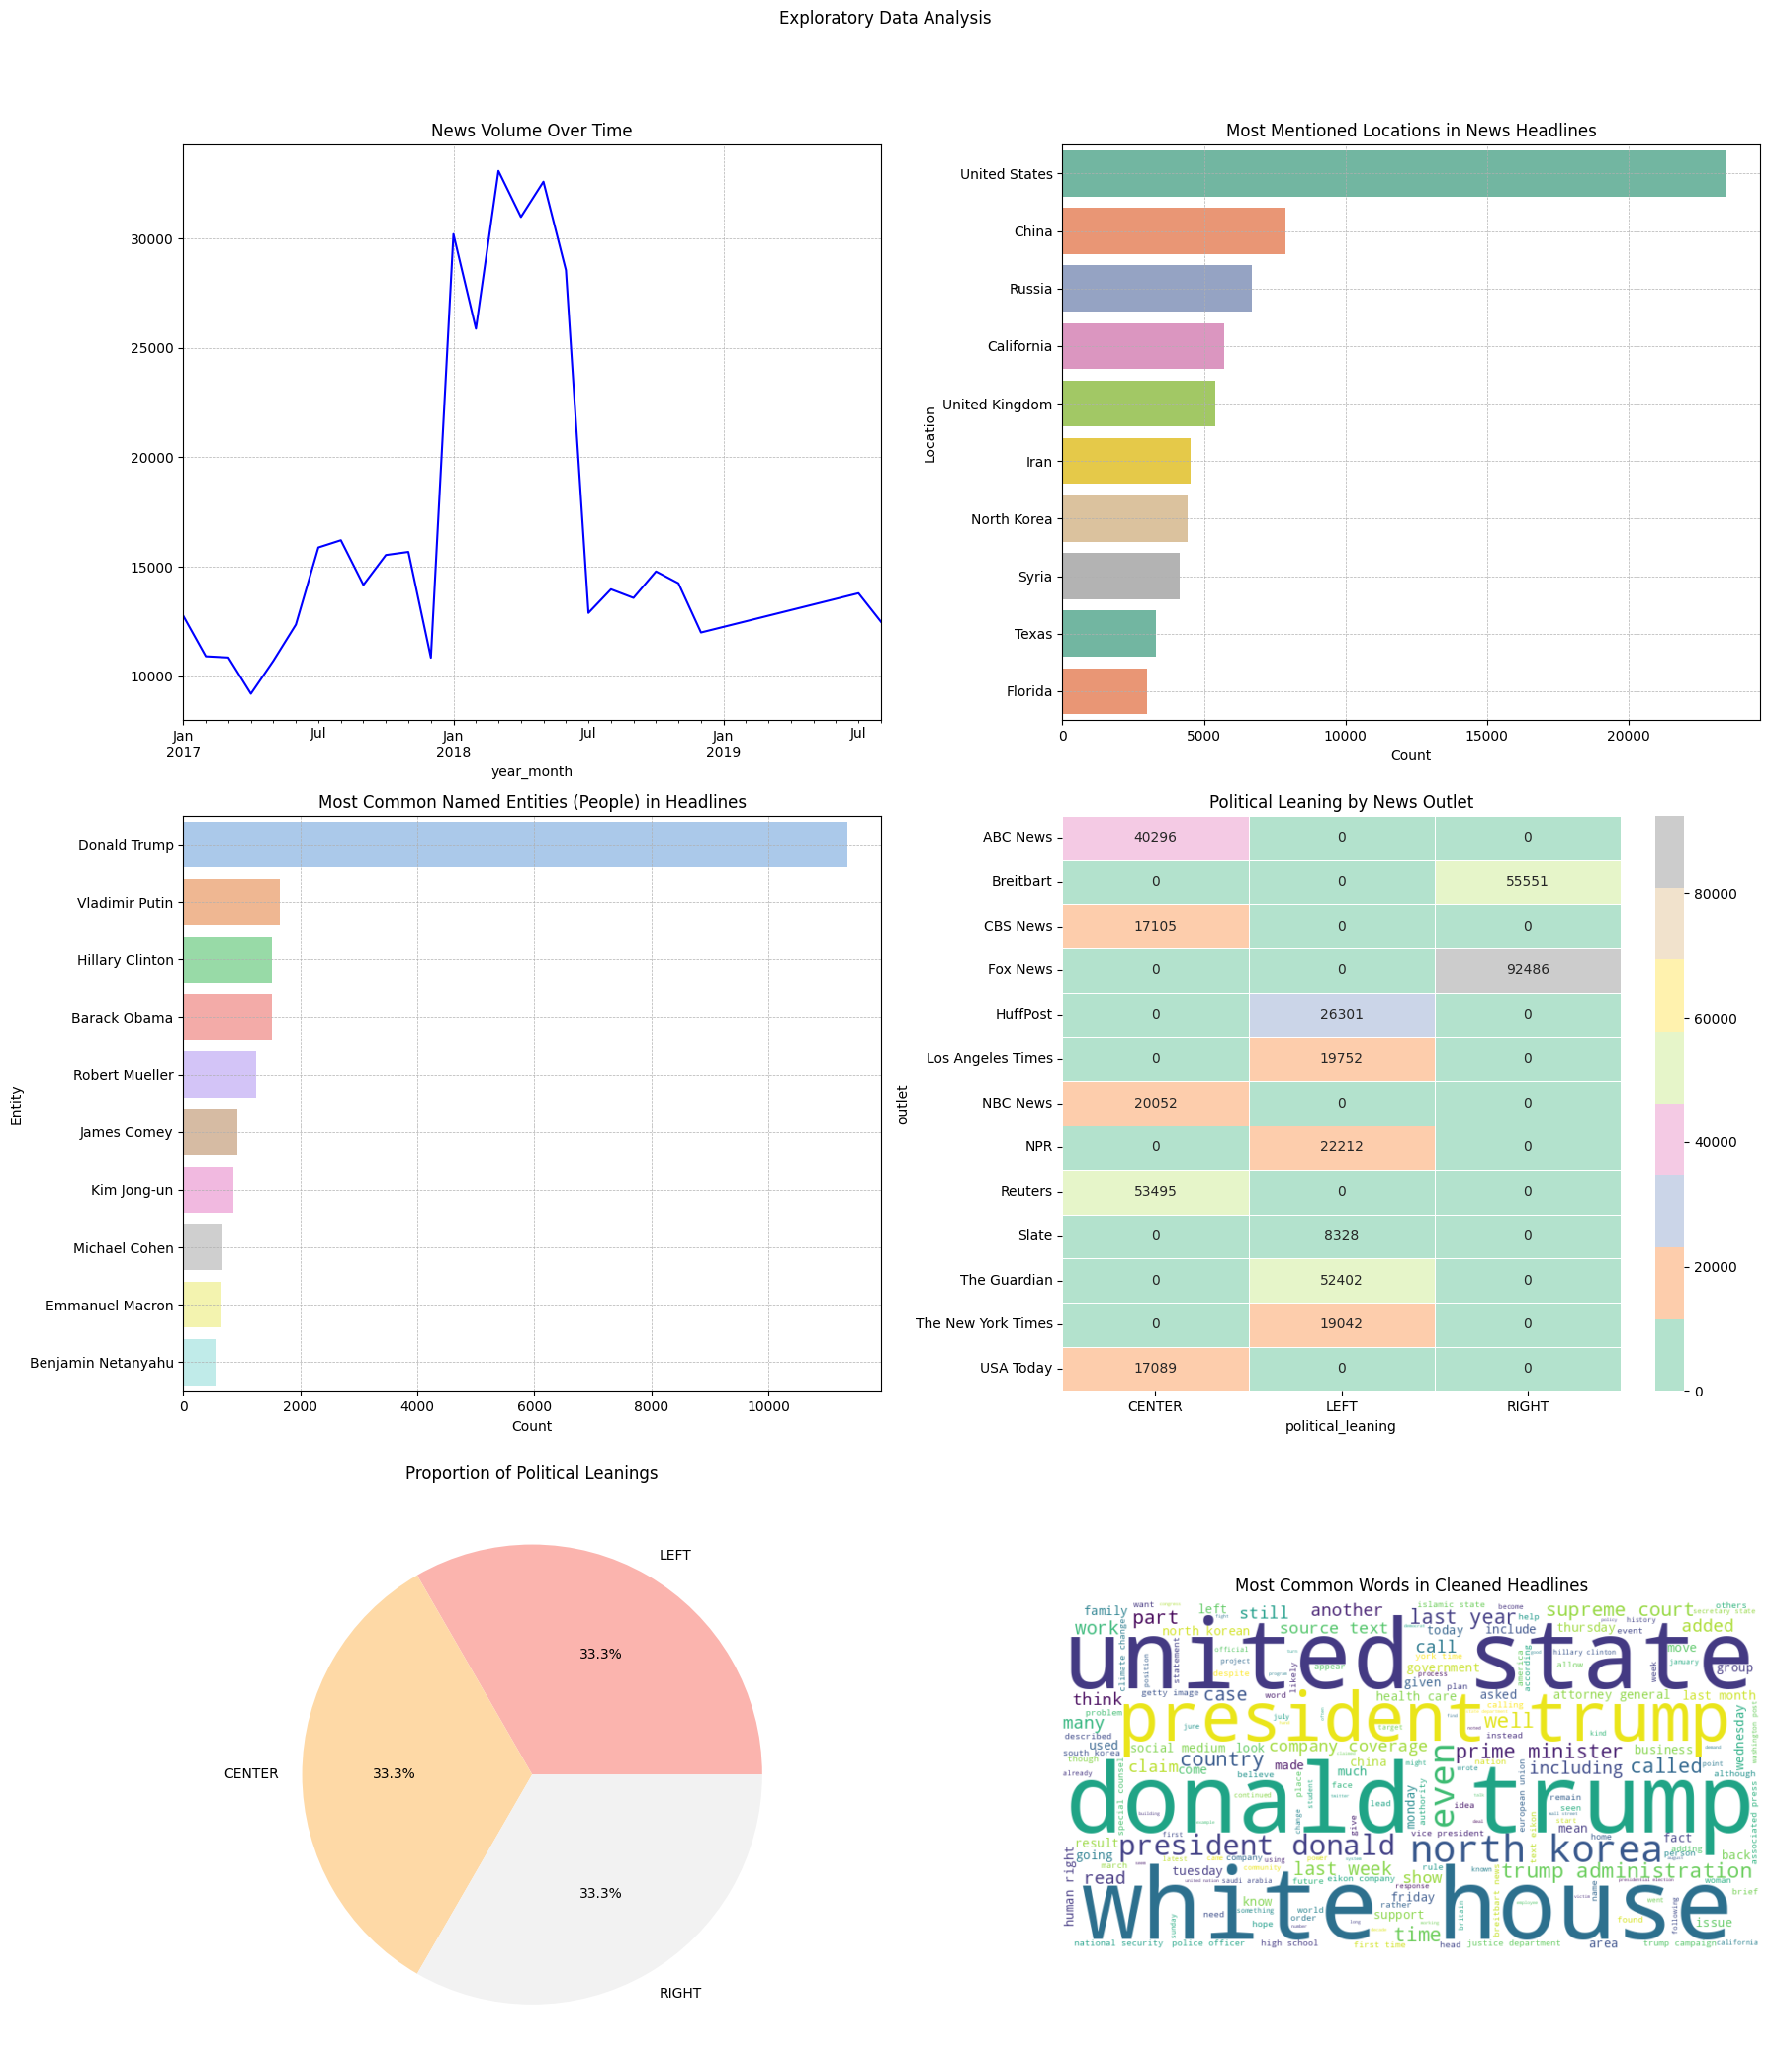

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Filter out unnecessary words for the word cloud
excluded_words = {"said", "saying", "told", "says", "say", "report", "reported"}
filtered_text = ' '.join([word for word in ' '.join(data_balanced["text_cleaned"]).split() if word not in excluded_words])

# Prepare data for countplot of named entities
top_entities_df = pd.DataFrame({"Entity": top_entities, "Count": top_entities_count})
top_entities_df = top_entities_df.sort_values(by="Count", ascending = False)

# Create figure for EDA with adjusted visualizations
fig, axes = plt.subplots(3, 2, figsize=(18, 22))
fig.suptitle('Exploratory Data Analysis')

data_balanced['date_publish'] = pd.to_datetime(data_balanced['date_publish'])
data_balanced['year_month'] = data_balanced['date_publish'].dt.to_period('M')
news_trend = data_balanced.groupby('year_month').size()
news_trend.plot(ax=axes[0, 0], title="News Volume Over Time", color="blue")
axes[0, 0].grid(linestyle = '--', linewidth=0.5)

top_locations_df = pd.DataFrame({"Location": top_locations, "Count": top_locations_count})
sns.barplot(x = "Count", y = "Location", data = top_locations_df, palette = "Set2", ax=axes[0, 1])
axes[0, 1].set_title("Most Mentioned Locations in News Headlines")
axes[0, 1].grid(linestyle = '--', linewidth=0.5)

sns.barplot(x = "Count", y = "Entity", data = top_entities_df, palette = "pastel", ax=axes[1, 0])
axes[1, 0].set_title("Most Common Named Entities (People) in Headlines")
axes[1, 0].grid(linestyle = '--', linewidth=0.5)

outlet_political_distribution = data_balanced.groupby(["outlet", "political_leaning"]).size().unstack(fill_value=0)
sns.heatmap(outlet_political_distribution, cmap = "Pastel2", annot=True, fmt="d", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Political Leaning by News Outlet")

data_balanced["political_leaning"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', ax=axes[2, 0], cmap = "Pastel1", labels=["LEFT", "CENTER", "RIGHT"])
axes[2, 0].set_ylabel("")  # Remove 'Count' label
axes[2, 0].set_title("Proportion of Political Leanings")

wordcloud_headlines = WordCloud(width = 800, height = 400, background_color = "white").generate(filtered_text)
axes[2, 1].imshow(wordcloud_headlines, interpolation = "bilinear")
axes[2, 1].axis("off")
axes[2, 1].set_title("Most Common Words in Cleaned Headlines")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Data Preprocessing </span>

In [1]:
import pandas as pd

data_balanced = pd.read_csv('../data/news_data.csv', header = 0)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.1. TF-IDF (Sparse Matrix) </span>
<div style="text-align: justify;">

 - TF-IDF matrices are usually sparse, meaning they contain many zero values, which makes computation faster.
 - Complexity: $O(N^2 · d)$  where d is the number of features (words).
 - For 400,000+ articles: It can take minutes to hours depending on the machine and the TF-IDF matrix sparsity.

Instead of computing all pairwise similarities, we use Nearest Neighbors Search for fast retrieval
</div>

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Convert the cleaned text into a TF-IDF matrix
vectorizer = TfidfVectorizer(max_features = 50_000)  # Limit features to speed up computation
tfidf_matrix = vectorizer.fit_transform(data_balanced['text_cleaned'])

# Fit NearestNeighbors model (LSH Approximate Search)
nn_tfidf = NearestNeighbors(n_neighbors = 5, metric='cosine', algorithm = 'auto', n_jobs = -1)
nn_tfidf.fit(tfidf_matrix)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [3]:
import pickle

# Save TF-IDF matrix (large, but needed for inference)
with open("../models/tfidf_matrix.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

# Save Nearest Neighbors model
with open("../models/nn_tfidf.pkl", "wb") as f:
    pickle.dump(nn_tfidf, f)

print("TF-IDF and Nearest Neighbors models saved successfully")

TF-IDF and Nearest Neighbors models saved successfully


### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.2. SBERT (Dense Embeddings) </span>
<div style="text-align: justify;">

 - SBERT generates dense vectors, which require more memory and computations.
 - Complexity: $O(N^2)$ (because each article is a 384-dimension vector in all-MiniLM-L6-v2).
 - For 400,000+ articles: The similarity matrix would be huge (400,000 × 400,000 = 40 billion values), making it impractical to compute in RAM.

Instead of computing cosine similarity for all pairs, we use FAISS (Facebook AI Similarity Search) for fast vector search
</div>

In [4]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer
import torch

torch.set_default_device("mps")

sbert_model = SentenceTransformer('all-MiniLM-L6-v2', device = "mps")
def encode_in_batches(texts, model, batch_size = 20000):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        batch_embeddings = model.encode(batch, convert_to_numpy=True)
        embeddings.append(batch_embeddings)
        print(f"Processed {i + len(batch)}/{len(texts)} articles")
    return np.vstack(embeddings)

sbert_embeddings = encode_in_batches(data_balanced['text_cleaned'].tolist(), sbert_model, batch_size = 20000)
sbert_embeddings = sbert_embeddings.astype('float32')

faiss.normalize_L2(sbert_embeddings)

# Create FAISS Index
dimension = sbert_embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)
index.add(sbert_embeddings)

Processed 20000/444111 articles
Processed 40000/444111 articles
Processed 60000/444111 articles
Processed 80000/444111 articles
Processed 100000/444111 articles
Processed 120000/444111 articles
Processed 140000/444111 articles
Processed 160000/444111 articles
Processed 180000/444111 articles
Processed 200000/444111 articles
Processed 220000/444111 articles
Processed 240000/444111 articles
Processed 260000/444111 articles
Processed 280000/444111 articles
Processed 300000/444111 articles
Processed 320000/444111 articles
Processed 340000/444111 articles
Processed 360000/444111 articles
Processed 380000/444111 articles
Processed 400000/444111 articles
Processed 420000/444111 articles
Processed 440000/444111 articles
Processed 444111/444111 articles


In [5]:
np.save("../models/sbert_embeddings.npy", sbert_embeddings)
print("SBERT embeddings saved successfully")

faiss.write_index(index, "../models/faiss_index.bin")
print("FAISS index saved successfully")

SBERT embeddings saved successfully
FAISS index saved successfully


## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Recommender Sytem </span>

In [3]:
import pickle

# Load TF-IDF matrix
with open("../models/tfidf_matrix.pkl", "rb") as f:
    tfidf_matrix = pickle.load(f)

# Load Nearest Neighbors model
with open("../models/nn_tfidf.pkl", "rb") as f:
    nn_tfidf = pickle.load(f)

print("TF-IDF and Nearest Neighbors models loaded successfully")

TF-IDF and Nearest Neighbors models loaded successfully


In [6]:
import numpy as np
import faiss

# Load SBERT embeddings
sbert_embeddings = np.load("../models/sbert_embeddings.npy")

# Load FAISS index
index = faiss.read_index("../models/faiss_index.bin")

print("SBERT embeddings and FAISS index loaded successfully")

SBERT embeddings and FAISS index loaded successfully


In [7]:
import random

def recommend_articles_tfidf_fast(article_id, df, nn_model, tfidf_matrix, top_n = 5):
    idx = df.index[df['id'] == article_id].tolist()[0]
    
    # Query TF-IDF vector
    distances, indices = nn_model.kneighbors(tfidf_matrix[idx])

    # Extract recommendations
    recommended_articles = df.iloc[indices[0][1:]].copy()
    
    # Remove duplicates
    recommended_articles = recommended_articles.drop_duplicates(subset=['headline'])

    # Ensure political diversity
    seen_leanings = set()
    diverse_recommendations = []
    
    for _, row in recommended_articles.iterrows():
        if row['political_leaning'] not in seen_leanings:
            diverse_recommendations.append(row)
            seen_leanings.add(row['political_leaning'])
        if len(diverse_recommendations) >= top_n:
            break
    
    # If we don't have enough, fill randomly
    if len(diverse_recommendations) < top_n:
        remaining_articles = recommended_articles[~recommended_articles['political_leaning'].isin(seen_leanings)]
        diverse_recommendations.extend(random.sample(remaining_articles.to_dict('records'), min(top_n - len(diverse_recommendations), len(remaining_articles))))
    
    return pd.DataFrame(diverse_recommendations)[['id', 'headline', 'political_leaning']]

recommend_articles_tfidf_fast(4587902, data_balanced, nn_tfidf, tfidf_matrix, top_n=5)

,id,headline,political_leaning
84207,4587902,McMaster: FBI indictments prove Russia meddled...,RIGHT
200788,115897612,The Latest: Trump tweet undercuts McMaster Rus...,CENTER


In [8]:
import numpy as np

def recommend_articles_sbert_faiss(article_id, df, index, embeddings, top_n=5):
    idx = df.index[df['id'] == article_id].tolist()[0]
    
    # Query the FAISS index
    query_vector = np.array([embeddings[idx]]).astype('float32')
    faiss.normalize_L2(query_vector)  # Normalize for cosine similarity
    
    distances, indices = index.search(query_vector, top_n + 1)  # +1 to exclude itself
    
    return df.iloc[indices[0][1:]][['id', 'headline', 'political_leaning']]

recommend_articles_sbert_faiss(4587902, data_balanced, index, sbert_embeddings, top_n=5)


,id,headline,political_leaning
84207,4587902,McMaster: FBI indictments prove Russia meddled...,RIGHT
200788,115897612,The Latest: Trump tweet undercuts McMaster Rus...,CENTER
303188,4402867,The Latest: McMaster: Russian meddling beyond ...,RIGHT
44982,4402867,The Latest: McMaster: Russian meddling beyond ...,RIGHT
240241,39075228,Senior Trump adviser says Russian election med...,LEFT


Now we combine TF-IDF (LSH-based) and SBERT (FAISS-based)

In [9]:
def hybrid_recommendations(article_id, df, nn_tfidf, tfidf_matrix, faiss_index, sbert_embeddings, top_n = 5):
    # Get TF-IDF recommendations (Top-3 for relevance)
    tfidf_recommendations = recommend_articles_tfidf_fast(article_id, df, nn_tfidf, tfidf_matrix, top_n = 5)
    
    # Get SBERT recommendations (Top-3 for diversity)
    sbert_recommendations = recommend_articles_sbert_faiss(article_id, df, faiss_index, sbert_embeddings, top_n = 5)

    # Combine results, removing duplicates
    combined_recommendations = pd.concat([tfidf_recommendations, sbert_recommendations]).drop_duplicates(subset=['headline']).head(top_n)

    return combined_recommendations

# Hybrid approach (TF-IDF + SBERT)
hybrid_recommendations(4587902, data_balanced, nn_tfidf, tfidf_matrix, index, sbert_embeddings, top_n = 5)

,id,headline,political_leaning
84207,4587902,McMaster: FBI indictments prove Russia meddled...,RIGHT
200788,115897612,The Latest: Trump tweet undercuts McMaster Rus...,CENTER
303188,4402867,The Latest: McMaster: Russian meddling beyond ...,RIGHT
240241,39075228,Senior Trump adviser says Russian election med...,LEFT


In [10]:
hybrid_recommendations(4509329, data_balanced, nn_tfidf, tfidf_matrix, index, sbert_embeddings, top_n = 5)

,id,headline,political_leaning
4,4509329,Orange County city votes again to opt out of C...,RIGHT
335724,4351819,California City Votes to Defy 'Sanctuary State...,RIGHT
389336,4380843,More California cities looking to reject state...,RIGHT


In [11]:
hybrid_recommendations(113887756, data_balanced, nn_tfidf, tfidf_matrix, index, sbert_embeddings, top_n = 5)

,id,headline,political_leaning
333436,52937377,"After 20 Years, What It Would Take For A Democ...",LEFT
145408,55311421,NBC News: Doug Jones is apparent winner in Ala...,CENTER
285595,55205448,Democrats wrestle with alleged misconduct in t...,CENTER
190453,4318559,'It's Too Expensive:' Alabama Democrat Doug Jo...,RIGHT
36483,1861807,Democrat Jones wins U.S. Senate seat in Alabam...,CENTER


- Make a table to put the first news (the one used for recommending), outlet.
- Also, diverse political leaning.
- Ask if the CBF is correct, it is overspecialized but we want this for the part of personalization.-